In [21]:
import numpy as np
import cv2
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import zscore

In [37]:


def apply_sigmoid(x, gain=1.0, threshold=0.5):
    """Sigmoid function to map standard deviation to flat or textured."""
    return 1 / (1 + np.exp(-gain * (x - threshold)))

def texture_map(image, block_size=8, gain=1.0, threshold=0.5):
    """Creates a texture map by convolving a block over the image and calculating standard deviation."""
    

    gray = np.array(image)
    #gray = zscore(gray)

    # Step 2: Initialize the standard deviation map
    std_map = np.zeros_like(gray, dtype=float)
    
    # Step 3: Pad the image to handle edge blocks
    padded_image = np.pad(gray, block_size // 2, mode='edge')

    # Step 4: Calculate standard deviation for each block
    for i in range(0, gray.shape[0]):
        for j in range(0, gray.shape[1]):
            # Extract block around current pixel
            block = padded_image[i:i+block_size, j:j+block_size]
            std_map[i, j] = np.std(block)

    # Step 5: Apply sigmoid function to standard deviation map
    texture_map = apply_sigmoid(std_map, gain=gain, threshold=threshold)

    # Step 6: Assume edges are flat
    texture_map[:, :block_size // 2] = 0
    texture_map[:, -block_size // 2:] = 0
    texture_map[:block_size // 2, :] = 0
    texture_map[-block_size // 2:, :] = 0
    
    #step 7 binary 
    binary_tex_map = np.where(texture_map > 0.7, 1, 0)

    return std_map, texture_map, binary_tex_map


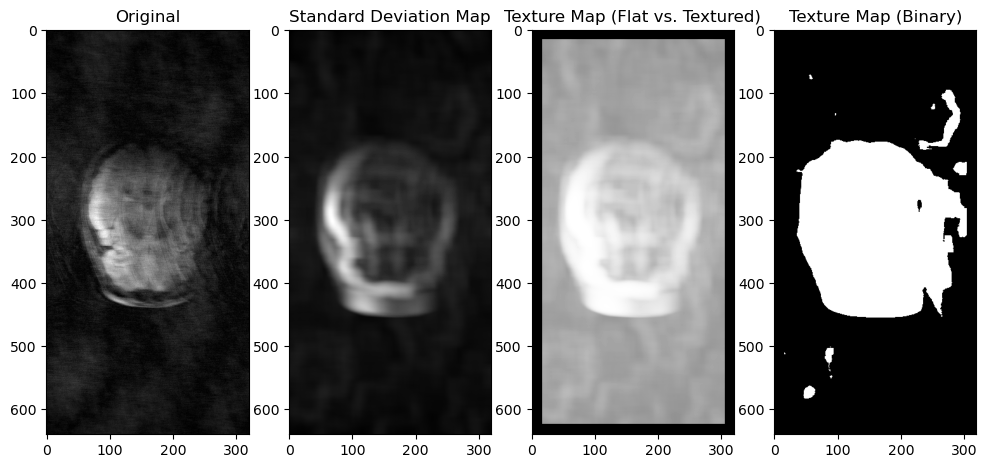

In [38]:
# Example usage
image = Image.open(r'D:\Class Project\209\noisy_image2.tiff')  # Load the image as grayscale
block_size = 32  # Size of the block for local std dev
gain = 0.1  # Gain for sigmoid function (higher = sharper transition between flat/textured)
threshold = 0.9  # Sigmoid threshold for classifying flat vs. textured

std_map, tex_map, binary_map= texture_map(image, block_size, gain, threshold)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Standard Deviation Map")
plt.imshow(std_map, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Texture Map (Flat vs. Textured)")
plt.imshow(tex_map, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Texture Map (Binary)")
plt.imshow(binary_map, cmap='gray')

plt.show()


Image saved as TIFF.
